In [33]:
label_font_conf = {
    # "weight": "bold",
    "size": "15"
}
bar_confs = {
    "color": ["white", "white", "silver"],
    "linewidth": 1,
    "hatch": ["", "//", ""],
    "edgecolor": "black",
}

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import sys

origin = {'roberta-large': [10.431, 5.817,2.323],
 'roberta-base': [4.289, 2.615, 1.011]}
label_font_conf = {
    # "weight": "bold",
    "size": "15"
}
bar_confs = {
    "color": ["white", "white", "silver"],
    "linewidth": 1,
    "hatch": ["", "//", ""],
    "edgecolor": "black",
}
figure_mosaic = """
    AAA.BBB
    """

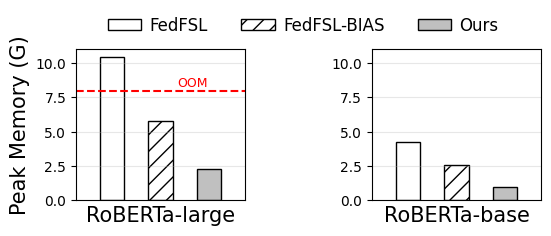

In [40]:
fig, axes = plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(6, 2), dpi=100)
bar_width = 0.03

x = [0.1, 0.1+bar_width*2, 0.1+bar_width*4]
data = origin

xlabels = ["roberta-large", "roberta-base"]
xlabels_fig = ["RoBERTa-large", "RoBERTa-base"]
ax = [axes["A"], axes["B"]]

for i in range(len(axes)):
    ax[i].set_xlabel(xlabels_fig[i], **label_font_conf)
    ax[i].set_ylim(0,11)
    if i == 0:
        ax[i].axhline(y=8,ls="--",c="r")
        ax[i].text(x=0.2,y=8.5,s="OOM",va='center', ha='center', fontsize=9, color="r")
    ax[i].set_xticks([])
    dataset = xlabels[i]  # video name
    fps = data[dataset]
    ax[i].bar(x, fps, width=bar_width, **bar_confs)

    ax[i].grid(axis="y", alpha=0.3)
    ax[i].set_xlim(min(x)-bar_width*1.5, max(x)+bar_width*1.5)

    # # tag value on the last bar.
    # rect = ax[i].patches
    # height = rect[-1].get_height()
    # absolute_value = round(energy[dataset][-1] * 5 / 100, 1)
    # if i == 0:
    #     ax[i].text(x[-1]-0.025, height+0.2,absolute_value) 
    # elif i == 1:
    #     ax[i].text(x[-1]-0.025, height+0.5,absolute_value) 
    # elif i == 2:
    #     ax[i].text(x[-1]-0.025, height+0.30,absolute_value) 
    # elif i == 3:
    #     absolute_value = round(energy[dataset][-1] * 5 / 600, 1)
    #     ax[i].text(x[-1]-0.025, height+0.04,absolute_value) 


ax[0].set_ylabel(r"Peak Memory (G)", **label_font_conf)
# https://matplotlib.org/stable/api/container_api.html#module-matplotlib.container
bars = ax[0].containers[0].get_children()
# ["fecls","origin","bitfit", "bitfit+filter", "bitfit+filter+curriculum"]
labels = ["FedFSL", "FedFSL-BIAS", "Ours"]
ax[0].legend(bars, labels, ncol=3, loc="lower left", bbox_to_anchor=(0.1, 1),frameon=False,fontsize=12,columnspacing = 2,handletextpad=0.5)

plt.subplots_adjust(wspace=2.5)
# plt.show()
plt.savefig('/Users/cdq/Desktop/opensource/FedPrompt/figs/cost/wyz-memory.pdf', bbox_inches="tight")